<a href="https://colab.research.google.com/github/HamsalekhaYerra/Hamsalekha_INFO_5731_Spring2022/blob/main/In_class_exercise_04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import io
import os.path
import re
import tarfile
import nltk
nltk.download('wordnet')
import smart_open

def extract_documents(url='https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz'):
    with smart_open.open(url, "rb") as file:
        with tarfile.open(fileobj=file) as tar:
            for member in tar.getmembers():
                if member.isfile() and re.search(r'nipstxt/nips\d+/\d+\.txt', member.name):
                    member_bytes = tar.extractfile(member).read()
                    yield member_bytes.decode('utf-8', errors='replace')

docs = list(extract_documents())
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

            # Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)


top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Number of unique tokens: 8644
Number of documents: 1740
Average topic coherence: -1.1058.
[([(0.009382981, 'action'),
   (0.008594196, 'policy'),
   (0.0062637823, 'optimal'),
   (0.0053533614, 'reinforcement'),
   (0.0048014093, 'markov'),
   (0.0044486723, 'reinforcement_learning'),
   (0.003933979, 'reward'),
   (0.0037326408, 'stochastic'),
   (0.0036743341, 'approximation'),
   (0.0036696158, 'bayesian'),
   (0.0036329373, 'dynamic'),
   (0.0036105101, 'control'),
   (0.0035710565, 'decision'),
   (0.0035095399, 'cost'),
   (0.0034035116, 'iteration'),
   (0.0032801856, 'estimate'),
   (0.003015707, 'prediction'),
   (0.0029816376, 'transition'),
   (0.0029739072, 'update'),
   (0.0029185996, 'prior')],
  -0.955606705447432),
 ([(0.007431366, 'mixture'),
   (0.007258113, 'gaussian'),
   (0.0066225487, 'class'),
   (0.006213495, 'density'),
   (0.0056121945, 'likelihood'),
   (0.0048323884, 'matrix'),
   (0.004791534, 'estimate'),
   (0.0047718254, 'log'),
   (0.0046001133, 'sample

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


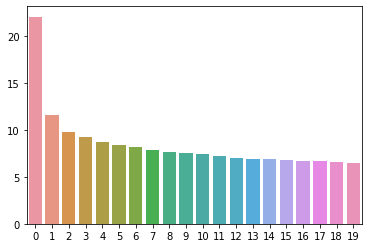

In [3]:
# Write your code here
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True)
import nltk
import string
import pandas as pd 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
#print repr(string)
stop_words += list(string.punctuation)
stop_words += ['__', '___']
# Uncomment and run the 3 lines below if you haven't got these packages already
#nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def rmv_emails_websites(string):
    """Function removes emails, websites and numbers"""
    new_str = re.sub(r"\S+@\S+", '', string)
    new_str = re.sub(r"\S+.co\S+", '', new_str)
    new_str = re.sub(r"\S+.ed\S+", '', new_str)
    new_str = re.sub(r"[0-9]+", '', new_str)
    return new_str
X_train = list(map(rmv_emails_websites, X_train))
X_test  = list(map(rmv_emails_websites, X_test))

tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=tokenizer.tokenize, 
                        max_df=0.2,
                        min_df=0.02
                       )
tfidf_train_sparse = tfidf.fit_transform(X_train)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), 
                        columns=tfidf.get_feature_names())
tfidf_train_df.head()

from sklearn.decomposition import TruncatedSVD
lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

sns.barplot(x=list(range(len(Sigma))), y = Sigma)

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [4]:
# Write your code here
!pip install lda2vec
!pip install pyLDAvis
#from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass
import pyLDAvis
pyLDAvis.enable_notebook()

#https://github.com/cemoody/lda2vec/blob/master/examples/hacker_news/lda2vec/lda2vec_run.py
import numpy as np
#python prepare_data_h36m.py
#Run preprocess


import numpy as np
import tempfile
import os
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array(['Car', 'Bus', 'Vehicles'])
with tempfile.TemporaryDirectory() as tmpdir:
  path = os.path.join(tmpdir,"123.npz")
  np.savez(path, a=a, b=b)
  data = np.load(path,encoding="ASCII")
  print(data['a'],data['b'])
    
#dat = {k: v for (k, v) in npz.iteritems()}
#dat['vocab'] = dat['vocab'].tolist()

#top_n = 3
#topic_to_topwords = {}
#for j, topic_to_word in enumerate(dat['topic_term_dists']):
 #   top = np.argsort(topic_to_word)[::-1][:top_n]
  #  msg = 'Topic %i '  % (j+ 1)
   # top_words = [dat['vocab'][i].strip()[:35] for i in top]
    #msg += ' '.join(top_words)
    #print (msg)
    #topic_to_topwords[j] = top_words

  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14433 sha256=bc1a307f3b9094b627a2a4a77327a7d5074aa337aef7bbc8dab6ee2eda0801d2
  Stored in directory: /root/.cache/pip/wheels/76/51/1c/1e2960ded8d6e14b14454493fcc9c2d879a7fb99421867f177
Successfully built lda2vec
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=08d6bc000c5f5f9d3b1330971dd6305557b99bdb2076932eb51a695b7fc5f3c0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
[[1 2 3]
 [4 5 6]] ['Car' 'Bus' 'Vehicles']


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [5]:
# Write your code here
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer

# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('bert-base-nli-mean-tokens')

# A corpus is a list with documents split by sentences.

sentences = ['Absence of sanity', 
             'Lack of saneness',
             'A man is eating food.',
             'A man is eating a piece of bread.',
             'The girl is carrying a baby.',
             'A man is riding a horse.',
             'A woman is playing violin.',
             'Two men pushed carts through the woods.',
             'A man is riding a white horse on an enclosed ground.',
             'A monkey is playing drums.',
             'A cheetah is running behind its prey.']

# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings = model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

import scipy
#@title Sematic Search Form

# code adapted from https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py

query = 'Nobody has sane thoughts' #@param {type: 'string'}

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches = 5 #@param {type: "number"}

print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))





     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 3.8 MB 33.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.8 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 895 kB 49.5 MB/s 
     |████████████████████████████████| 6.5 MB 34.7 MB/s 
     |████████████████████████████████| 596 kB 47.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=af35d54627f2020f2ae54a6216a1841427584bb894ddaec55175d4f0d49004ae
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [ 2.95403063e-01  2.91811526e-01  2.16480112e+00  2.20420152e-01
 -1.30862696e-02  1.01950312e+00  1.51298189e+00  2.34132841e-01
  2.73057312e-01  1.35123283e-01 -1.11313367e+00 -1.25884086e-01
  1.45378560e-01  9.77708459e-01  1.39352250e+00  4.57705498e-01
 -5.82132339e-01 -7.24941015e-01 -3.61733854e-01 -2.27515221e-01
  1.66626517e-02  2.04862148e-01  6.55132890e-01 -1.29376388e+00
 -7.26099133e-01 -1.91135928e-01 -3.07210803e-01 -1.30278611e+00
 -1.42963898e+00  5.67499548e-03  3.54811490e-01  4.83712137e-01
  6.65388703e-01  5.33848763e-01  6.40497327e-01  5.90408623e-01
  7.83849955e-02 -1.07759178e+00 -1.24676719e-01 -3.98406655e-01
  7.36314297e-01  5.28293490e-01  5.63291132e-01  4.14546072e-01
  4.49179351e-01 -9.58781540e-02  1.45424616e+00 -2.69144058e-01
 -2.44059414e-01 -1.10387099e+00 -2.00924307e-01 -2.17409199e-03
  1.83387983e+00  1.06518412e+00 -5.11945605e-01 -1.

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

On the surface, topic modelling, whether it is achieved using LDA, LSA, LDA2VEC or BERTopic, is very appealing. A document is partitioned into topics, which in turn have terms associated to varying degrees. However, these methods have some clear issues: the models are very sensitive to small changes. These changes can result in completely different topics; topics need to be manually categorised in order to be useful. Topics are "unstable" in the sense that adding new documents can cause significant changes to the topic distribution because of how the stemming/tokenization algorithms work. Each algorithm has its own shortcoming. Hence one can combine barious techniques where it is possible. LDA is the most popular and most used algorithm in real-life applications to extract topics from documents in unsupervised data since it provides accurate results and can be trained online. one does not have to know in advance what the topics will look like LSA It proved to process faster compared to other available topic modeling algorithms, as it involves document term matrix decomposition only.

Bertopic on the other hand is straight forward out-of-the-box usability and has novel interactive visualization methods such as barcharts. Representation in BERTopic can be done using various components which are visually appealing.